## Lectura District of Columbia




Lectura de los archivos de reviews de District of Columbia


In [1]:
import pandas as pd
import numpy as np
import missingno as msxo
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Lectura de archivos json de las reviews efectuadas en el estado de District of Columbia . Voy a proceder a realizar la lectura y juntar dichos archivos, al tener todos la misma estructura es posible realizarlo mediante iteracion.

In [2]:
df_1 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-District_of_Columbia\1.json', lines= True)
df_2 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-District_of_Columbia\2.json', lines= True)
df_3 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-District_of_Columbia\3.json', lines= True)
df_4 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-District_of_Columbia\4.json', lines= True)





In [4]:
# Creo una lista para poder juntar todos los dataframes de los archivos en uno
dfs = []

# Itero entre cada uno de los dataframes para juntarlos en uno solo
for i in range(1, 5):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


reviews_District_of_Columbia = pd.concat(dfs, ignore_index=True)

In [5]:
# Vista primeros registros
reviews_District_of_Columbia.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.042564e+20,Petre Ene,1551027526726,4,"the food is really good, I had a great experie...",[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89b7b7851b06ef6b:0x5f356b1eb1da27
1,1.086426e+20,Keshava Mysore,1510920735052,4,High prices for not so big portions! But I thi...,None,None,0x89b7b7851b06ef6b:0x5f356b1eb1da27
2,1.118429e+20,Carol G,1543249586598,2,"The gelato looked ""old"" and ended up having co...",None,None,0x89b7b7851b06ef6b:0x5f356b1eb1da27


In [6]:
# Miro cuantos registros tenemos en el dataframe unido

reviews_District_of_Columbia.shape

(564783, 8)

In [7]:
# Miro el tipo de información

reviews_District_of_Columbia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564783 entries, 0 to 564782
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  564783 non-null  float64
 1   name     564783 non-null  object 
 2   time     564783 non-null  int64  
 3   rating   564783 non-null  int64  
 4   text     294462 non-null  object 
 5   pics     29355 non-null   object 
 6   resp     41682 non-null   object 
 7   gmap_id  564783 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 34.5+ MB


In [8]:
# Checkeo de nulos y su porcentaje

nulls_FL = pd.DataFrame(reviews_District_of_Columbia.isnull().sum().sort_values(ascending = False))
nulls_FL["Porcentaje de nulos"] = round(nulls_FL/reviews_District_of_Columbia.shape[0]*100,2)
nulls_FL.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
pics,535428,94.80
resp,523101,92.62
text,270321,47.86
user_id,0,0.00
name,0,0.00
time,0,0.00
rating,0,0.00
gmap_id,0,0.00


In [9]:
columnas= ['pics', 'resp']
reviews_District_of_Columbia= reviews_District_of_Columbia.drop(columns=columnas)

In [10]:
reviews_District_of_Columbia.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'gmap_id'], dtype='object')

In [11]:
reviews_District_of_Columbia.dropna(inplace=True)

In [12]:
usuarios= reviews_District_of_Columbia.user_id.nunique()

In [13]:
reviews= reviews_District_of_Columbia.text.count()

In [15]:
print('En el Distrito de Columbia, tenemos',usuarios,' usuarios que dejaron',reviews, 'reseñas.')

En el Distrito de Columbia, tenemos 22977  usuarios que dejaron 294462 reseñas.


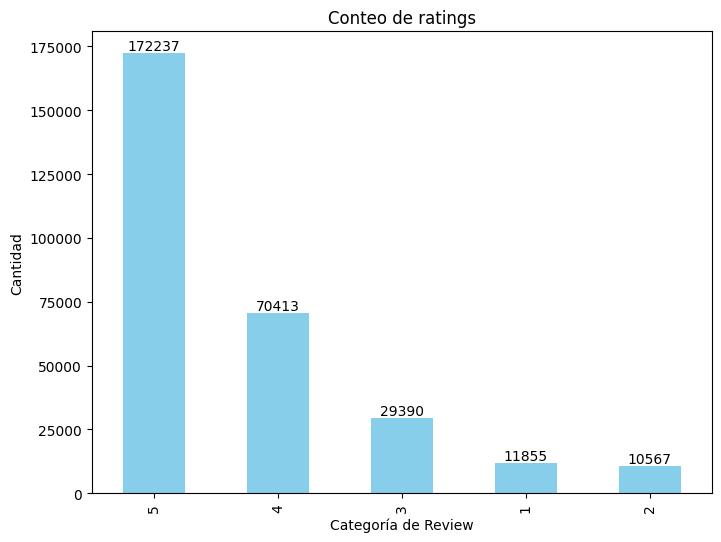

In [16]:
rating = reviews_District_of_Columbia.rating.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
rating.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, count in enumerate(rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configuración de etiquetas y título
plt.xlabel('Categoría de Review')
plt.ylabel('Cantidad')
plt.title('Conteo de ratings')

# Mostrar el gráfico
plt.show()


In [17]:
reviews_District_of_Columbia['time'] = pd.to_datetime(reviews_District_of_Columbia['time'], unit='ms').dt.strftime('%d/%m/%Y')

In [18]:
reviews_District_of_Columbia['time'] = pd.to_datetime(reviews_District_of_Columbia['time'], format='%d/%m/%Y')

reviews_District_of_Columbia['year'] = reviews_District_of_Columbia['time'].dt.year

In [19]:
min_date = reviews_District_of_Columbia.time.min()
minimun_date = pd.to_datetime(min_date)
print(min_date)
print(minimun_date)

1990-12-31 00:00:00
1990-12-31 00:00:00


In [20]:
max_date = reviews_District_of_Columbia.time.max()
maximun_date = pd.to_datetime(max_date)
print(max_date)
print(maximun_date)

2021-09-08 00:00:00
2021-09-08 00:00:00


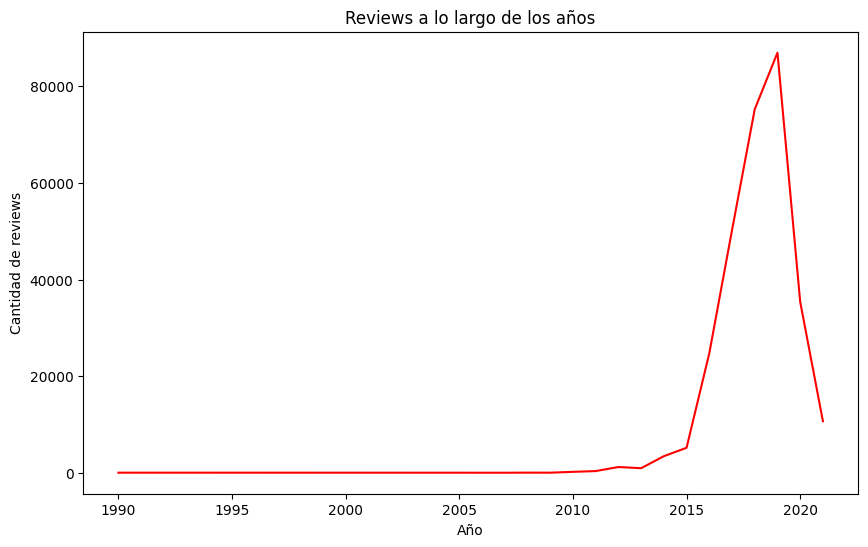

In [21]:
conteo_por_año= reviews_District_of_Columbia[['year', 'text']].groupby('year').count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_por_año, x='year', y= 'text', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.title('Reviews a lo largo de los años')
plt.show()


In [22]:
reviews_District_of_Columbia["text"] = reviews_District_of_Columbia["text"].astype(str)

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


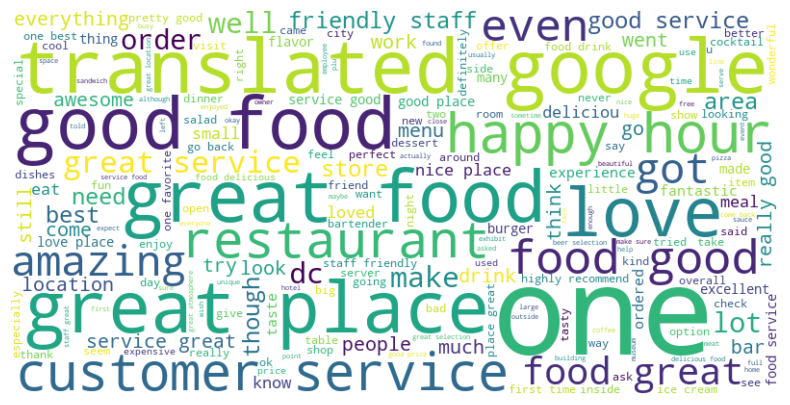

In [24]:
# Assuming you have a DataFrame named "reviews_XXXXXXXXXXXXXXXXXX" with a "text" column
texto = " ".join(reviews_District_of_Columbia["text"])

# Download NLTK data for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization and removing stopwords
stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Join the words into a text string
texto_procesado = " ".join(words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
